# Seaborn
- matplotlib을 기반으로 다양한 테마와 그래프를 제공하는 파이썬 시각화 패키지.-
- http://seaborn.pydata.org/
    - 공식 사이트의 [gallary](http://seaborn.pydata.org/examples/index.html)에 제공하는 다양한 그래프와 예제를 확인 할 수 있다.
- 설치: 아나콘다에는 포함되있다.
```
pip install seaborn
conda install seaborn
```
    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [9]:
# tips = pd.read_csv('data/tips.csv')
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## rugplot, kdeplot, distplot
- 1차원 연속형 값들의 분포를 시각화 하는 그래프

### rugplot 
- 각 데이터들의 위치를 보여준다.

In [10]:
tips['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

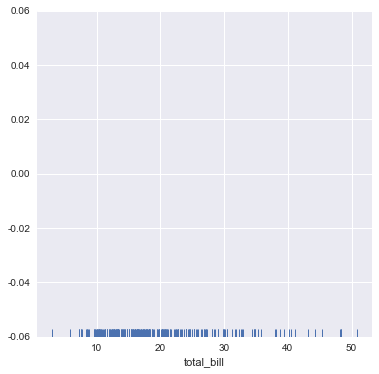

In [11]:
plt.figure(figsize=(6,6))
sns.rugplot(tips['total_bill'])
plt.show()

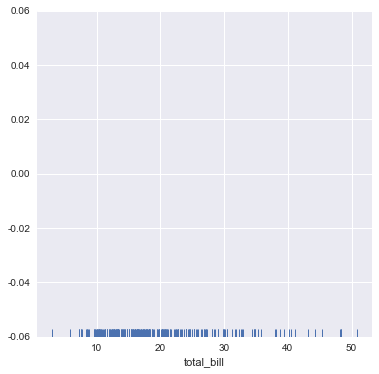

In [13]:
plt.figure(figsize=(6,6))
sns.rugplot('total_bill', data=tips)
plt.show()
# 컬럼명: 문자열
# data: DataFrame객체

### kdeplot
- 히스토그램을 부드러운 곡선 형태로 표현한다. 
- KDE(Kernel Density Estimation) : 확률밀도추정

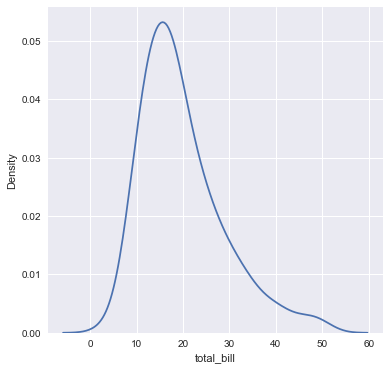

In [17]:
plt.figure(figsize=(6,6))
# sns.kdeplot(tips['total_bill'])
sns.kdeplot('total_bill', data=tips)
plt.show()

### distplot
- 히스토그램에 kdeplot, rugplot 한번에 그린다.
    - kdeplot은 default로 나오고 rugplot은 default로 안나온다.

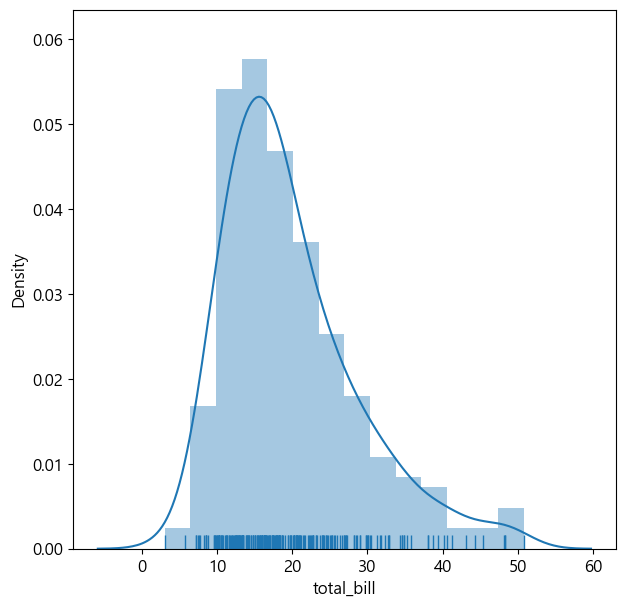

In [28]:
import warnings
warnings.filterwarnings(action='ignore')

plt.figure(figsize=(7,7))
sns.distplot(tips['total_bill'],
            hist=True,
            kde=True,
            rug=True)
plt.show()
# distplot은 dataframe과 컬럼을 나눠서 지정하는 구문 불가

## boxplot(), violinplot(), swamplot()
- 연속형 데이터(양적데이터)들의 분포를 확인하는 그래프를 그린다.
- 범주별로 연속형 데이터의 분포를 비교할 수 있다.

### boxplot

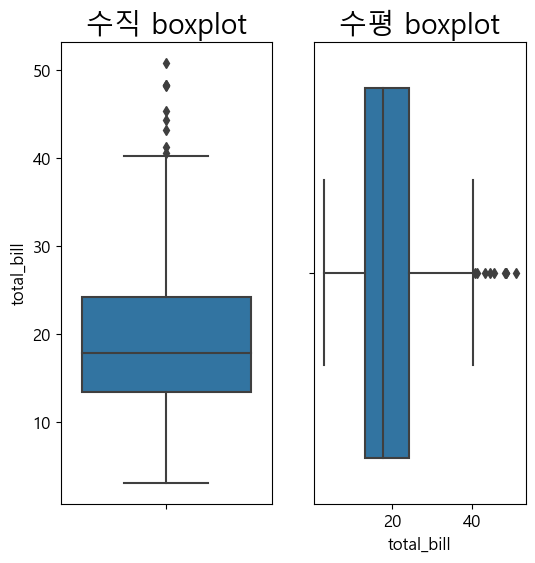

In [23]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
sns.boxplot(y=tips['total_bill']) # 수직
plt.title('수직 boxplot')

plt.subplot(1,2,2)
sns.boxplot(x=tips['total_bill'])
plt.title('수평 boxplot')
plt.show()

In [ ]:
yes

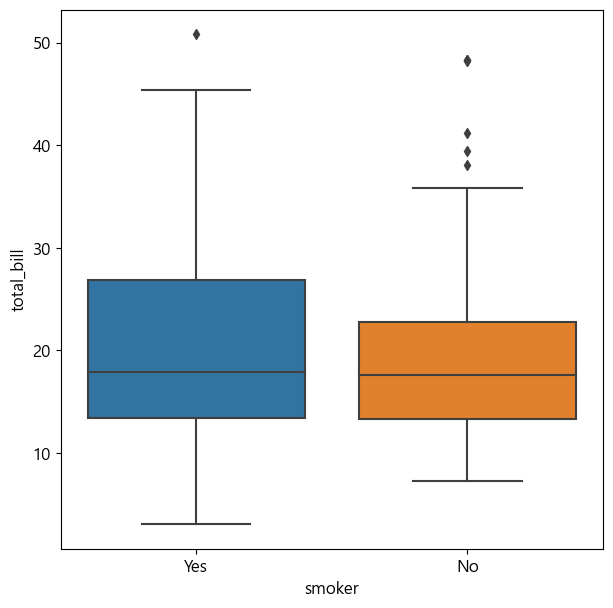

In [25]:
plt.figure(figsize=(7,7))

sns.boxplot(y='total_bill', x='smoker', data=tips)
# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

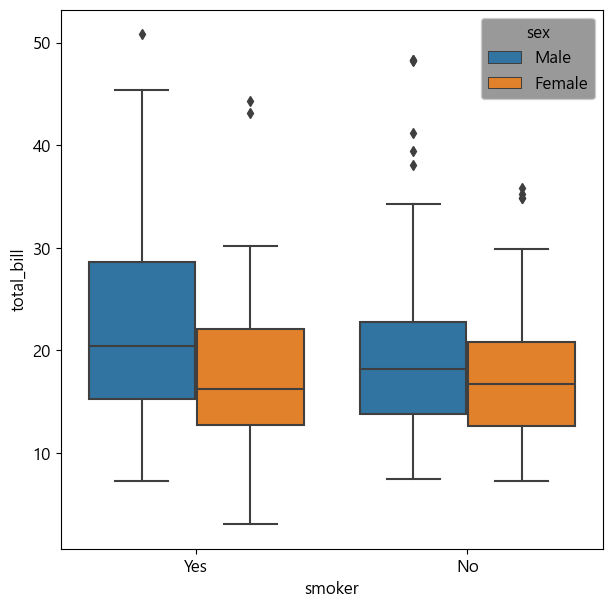

In [26]:
plt.figure(figsize=(7,7))

sns.boxplot(y='total_bill', x='smoker', hue='sex',  data=tips)
# x(y)축: 분포를 보려는 연속형 값의 컬럼, y(x)축: 그룹을 나누려는 범주형 컬럼
plt.show()

### violin plot
- boxplot 위에 분포 밀도(kernel density)를 좌우 대칭으로 덮어쓰는 방식으로 데이터의 분포를 표현하므로 boxplot 보다 좀더 정확한 데이터의 분포를 볼 수 있다.
- 매개변수는 boxplot과 동일

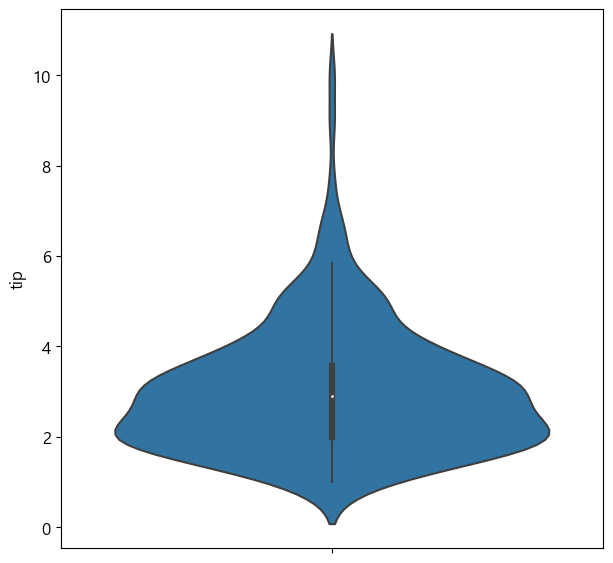

In [29]:
plt.figure(figsize=(7,7))
sns.violinplot(y='tip', data=tips)
plt.show()

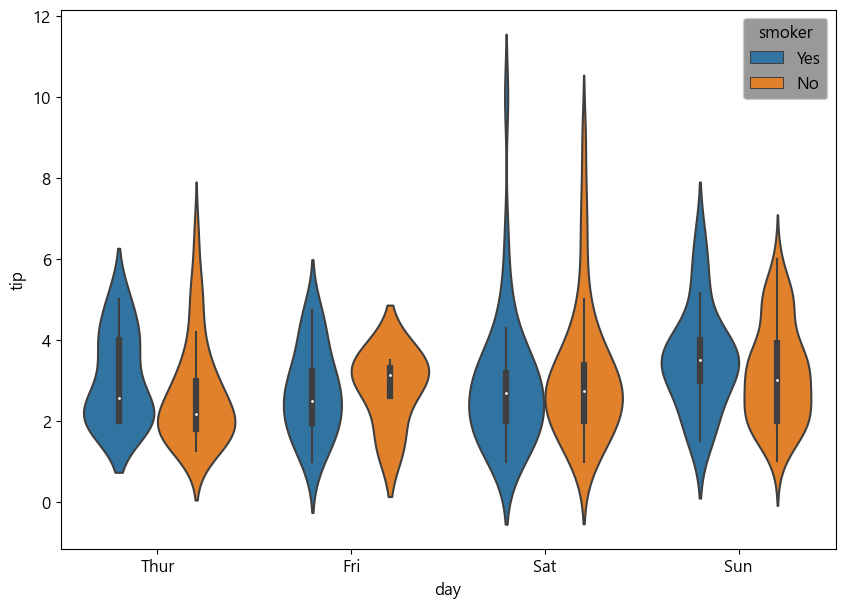

In [31]:
# 요일(day)별 tip의 분포
plt.figure(figsize=(10,7))
sns.violinplot(y='tip', x='day', hue='smoker', data=tips) # 요일-흡연여부
plt.show()

### swarmplot
- 실제 값들을 점으로 찍어 준다. 
- boxplot이나 violin plot을 보완해주는 역할로 쓰인다.
- swarmplot은 가운데 분류를 기준으로 분포시키는데 실제 값이 있는 위치에 점을 찍으므로 좀더 정확하게 값이 어디에 있는지 알 수 있다.

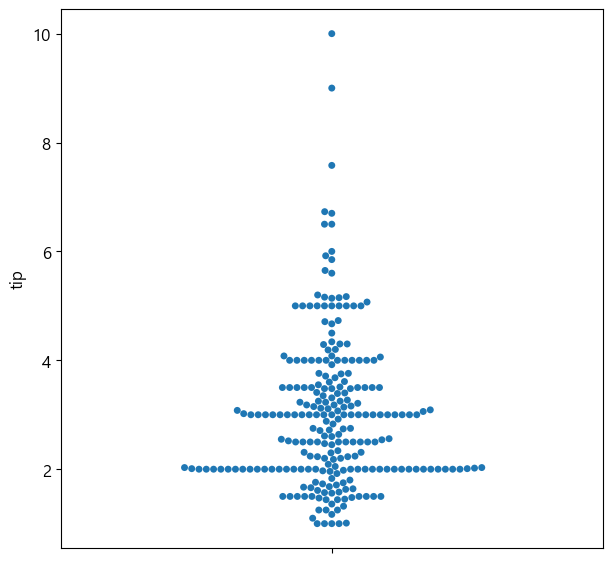

In [33]:
plt.figure(figsize=(7,7))
sns.swarmplot(y='tip', data=tips)
plt.show()

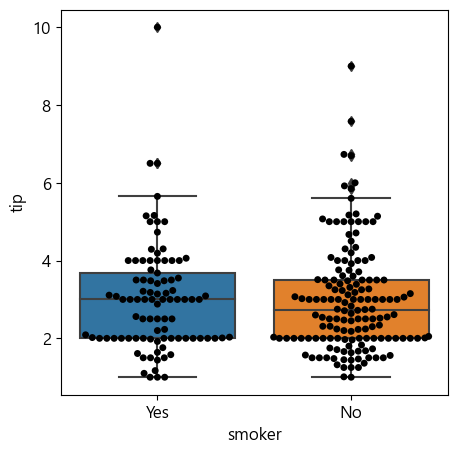

In [42]:
plt.figure(figsize=(5,5))

sns.boxplot(x='smoker', y='tip', data=tips)
sns.swarmplot(x='smoker', y='tip', data=tips, color='black')

plt.show()

### countplot() 
- 막대그래프(bar plot)을 그리는 함수
- 범주형 변수의 고유값의 개수를 표시
- matplotlib의 bar()

In [1]:
import matp
plt.figure(figsize=(5,5))

# 범주형 컬럼을 지정하면 고유값별로 개수를 세서 막대그래프를 그려준다.
# sns.countplot(x='day', data=tips)
sns.countplot(y='day', data=tips)

plt.show()

NameError: name 'plt' is not defined

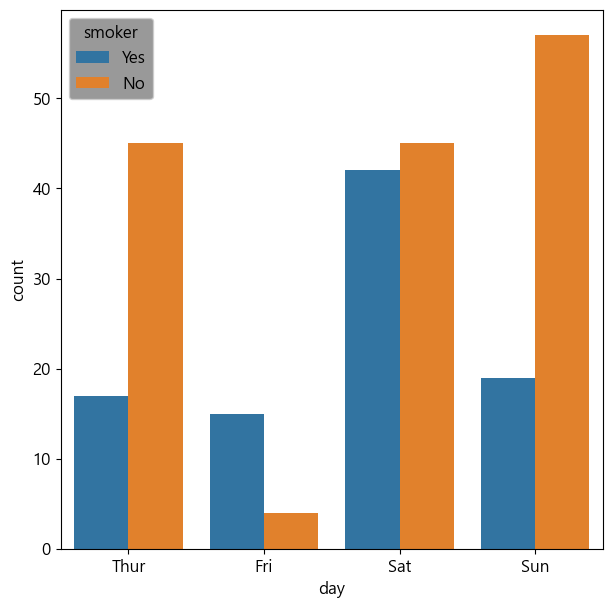

In [44]:
# 요일별-흡연여부별로
plt.figure(figsize=(7,7))

sns.countplot(x='day', hue='smoker', data=tips)

plt.show()

## scatterplot, lmplot, jointplot, pairplot
- 산점도를 그린다.

### scatterplot

팔레트 - https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

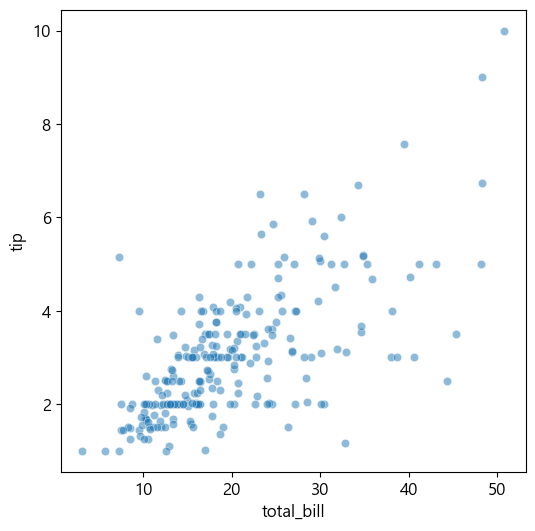

In [45]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.5)
plt.show()

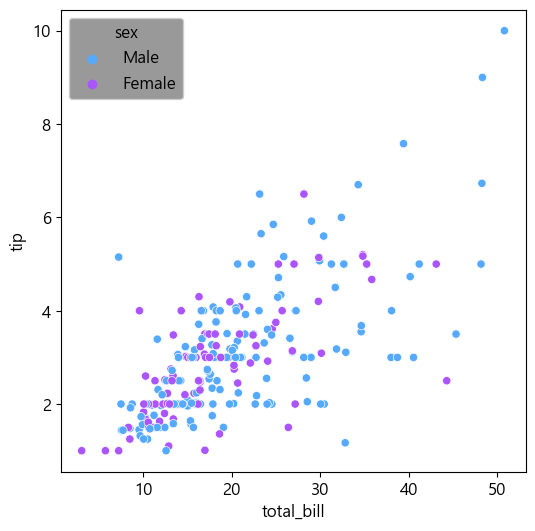

In [48]:
# 성별로 나눠서 확인
plt.figure(figsize=(6,6))
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips, palette='cool')
# colormap 지정: matplotlib/pandas - cmap, seaborn - palette
plt.show()

### lmplot() (lm - Linear Model 약자)
- 선형회귀 적합선을 포함한 산점도를 그린다.

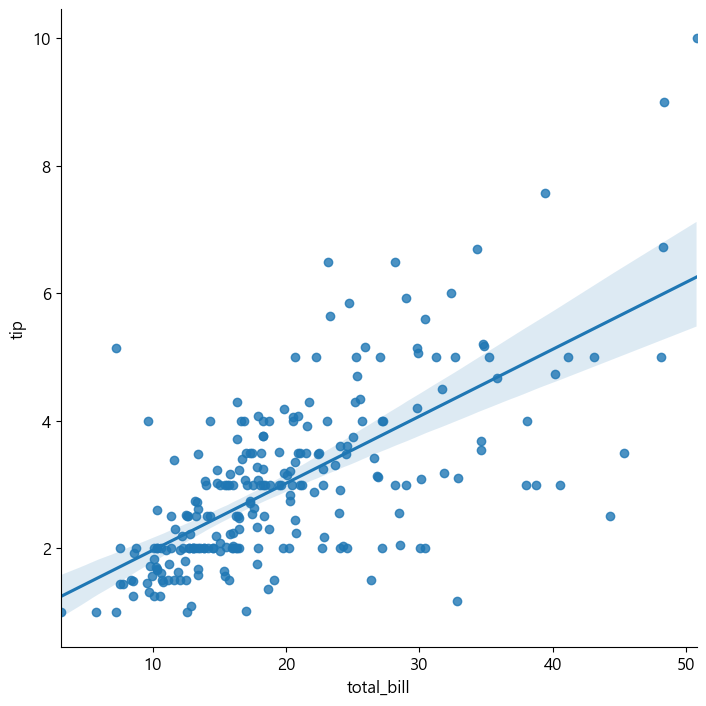

In [51]:
sns.lmplot(x='total_bill', y='tip', data=tips, height=7)
plt.show()

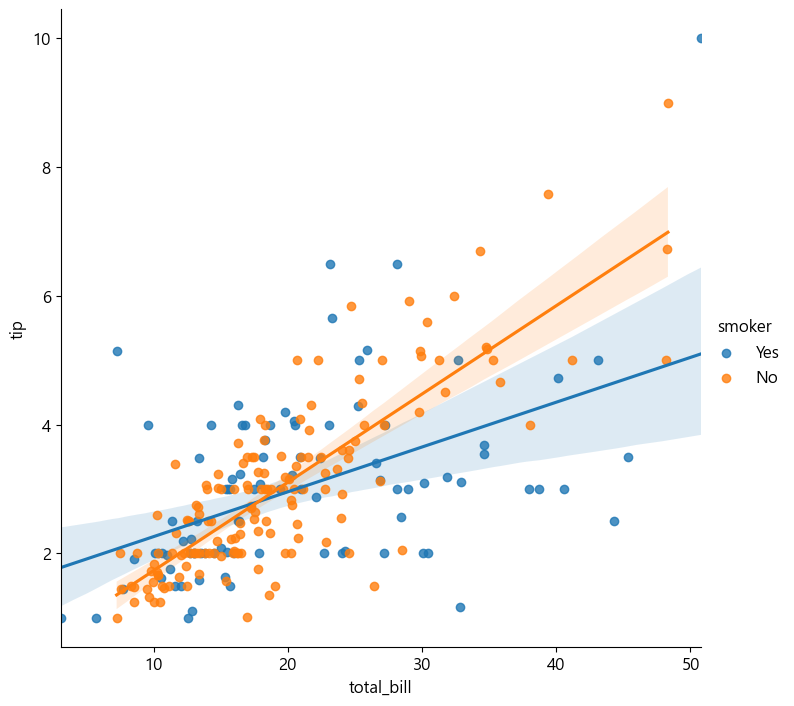

In [52]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, height=7)
plt.show()

### jointplot()
- scatter plot 과 각 변수의 히스토그램을 같이 그린다.
- pandas **DataFrame**만 사용할 수 있다.
- DataFrame

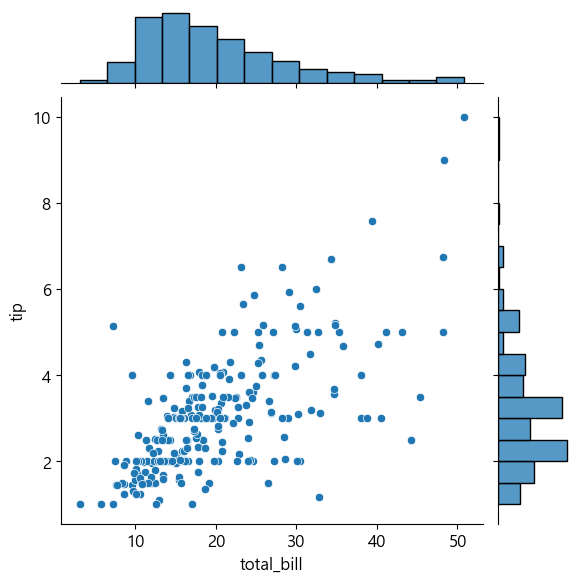

In [53]:
sns.jointplot(x='total_bill', y='tip', data=tips)
plt.show()

### pairplot
- 다변수(다차원) 데이터들 간의 산점도를 보여준다. 
- 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 변수간의 산점도를 그린다. 같은 변수가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

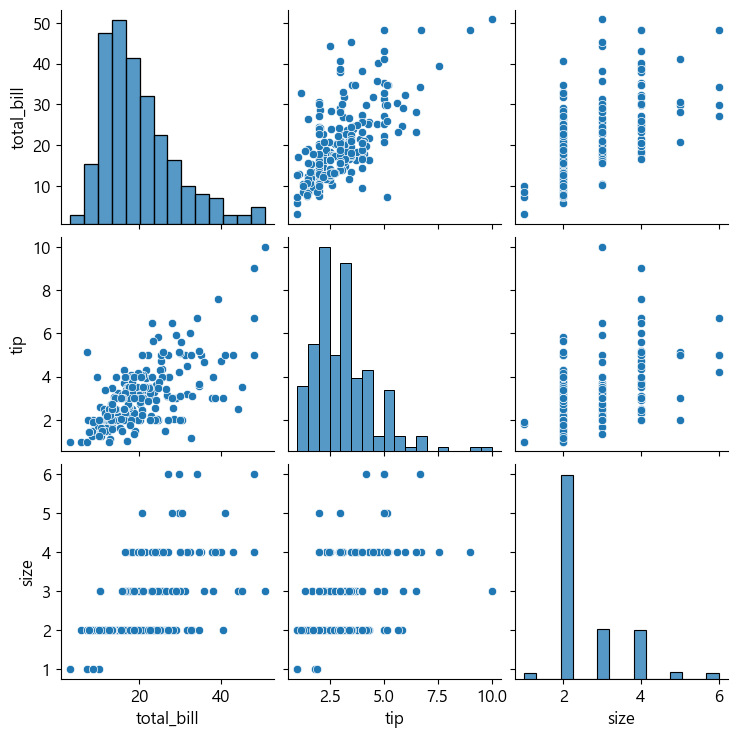

In [56]:
sns.pairplot(tips)
plt.show()

### heatmap()
- 값들에 비례해서 색깔을 다르게 해 2차원 자료로 시각화

In [57]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

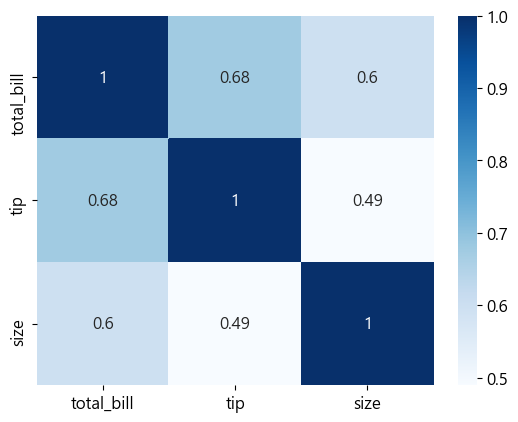

In [60]:
sns.heatmap(tips.corr(), annot=True, cmap='Blues')

### lineplot
- 선그래프
- 시간의 흐름에 따른 값의 변화를 보여주는데 유용하다. (시계열 데이터)

In [63]:
index = pd.date_range('2021/1/1', freq='D', periods=10)
value = np.random.randint(1,100,size=(10,3))
df = pd.DataFrame(value, index=index, columns=list('ABC'))
df.head(3)

,A,B,C
2021-01-01,35,26,25
2021-01-02,98,27,88
2021-01-03,87,4,52


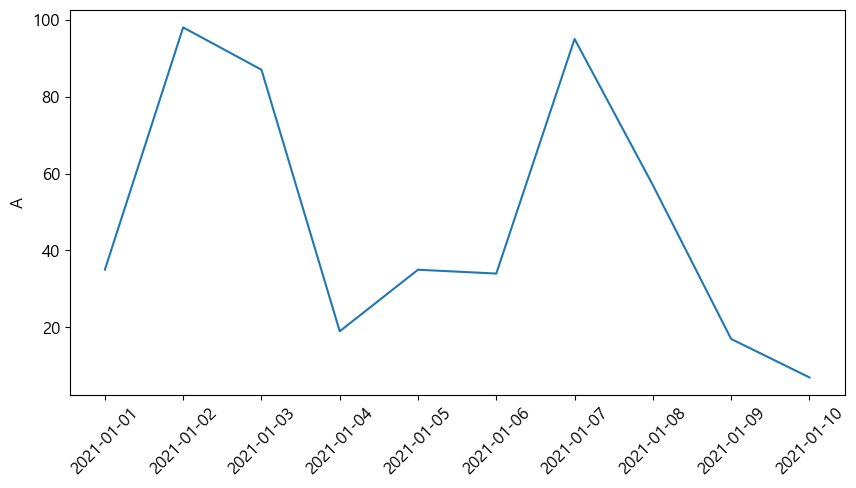

In [70]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df.index, y='A', data=df)
plt.xticks(df.index, rotation=45)
plt.show()